<a href="https://www.kaggle.com/code/mohammedaliamzyl/spaceship-titanic-eda-svm-80-8?scriptVersionId=140981742" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# EDA

In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [3]:
print(f"the size of the training data: {train.shape}")
print(f"the size of the testing data: {test.shape}")

the size of the training data: (8693, 14)
the size of the testing data: (4277, 13)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Numerical features

<Axes: xlabel='Age', ylabel='Count'>

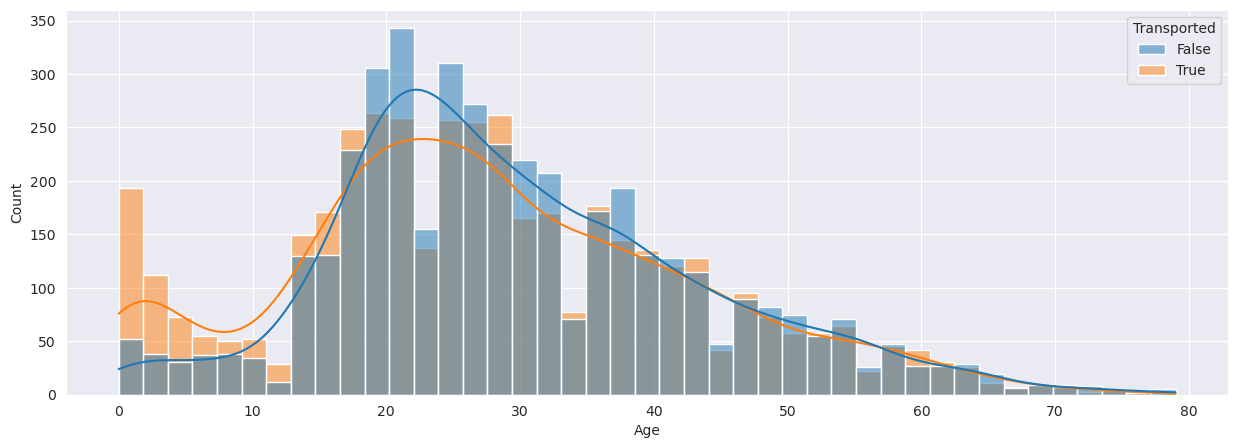

In [7]:
plt.figure(figsize=(15,5))
sns.histplot(train, x='Age', hue='Transported',kde=True)

**Notes:**
1. passengers between 0-20 are more likely to be transported
2. passengers between 20-35 are less likely to be transported
3. passengers over 40 are almost equally distributed between transported or not
4. most the passenger we have in the data are between 18-30

<Axes: xlabel='Age'>

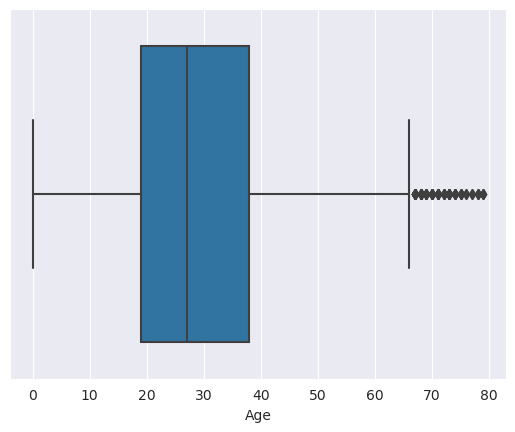

In [8]:
sns.boxplot(train, x='Age')

In [9]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


all of services have median of 0, let's see the extact propotion of passengers with no spending for each service

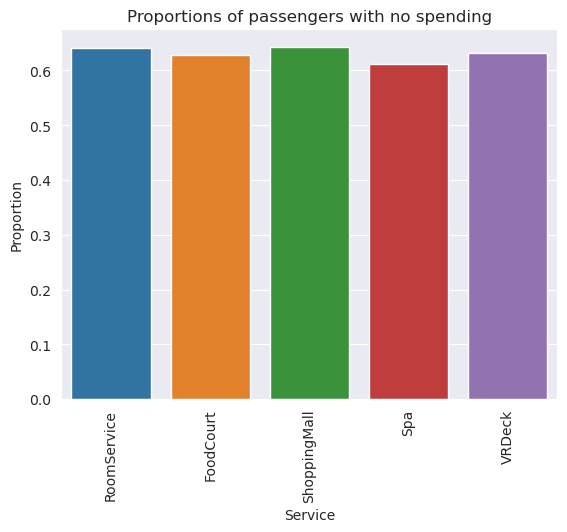

In [10]:
p = (train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]==0).mean()
sns.barplot(x=p.index, y=p.values)
plt.title("Proportions of passengers with no spending")
plt.ylabel('Proportion')
plt.xlabel('Service')
plt.xticks(rotation=90)
plt.show()

interesting! it seems like for each service, over 60% of the passengers don't spend on

(0.0, 1000.0)

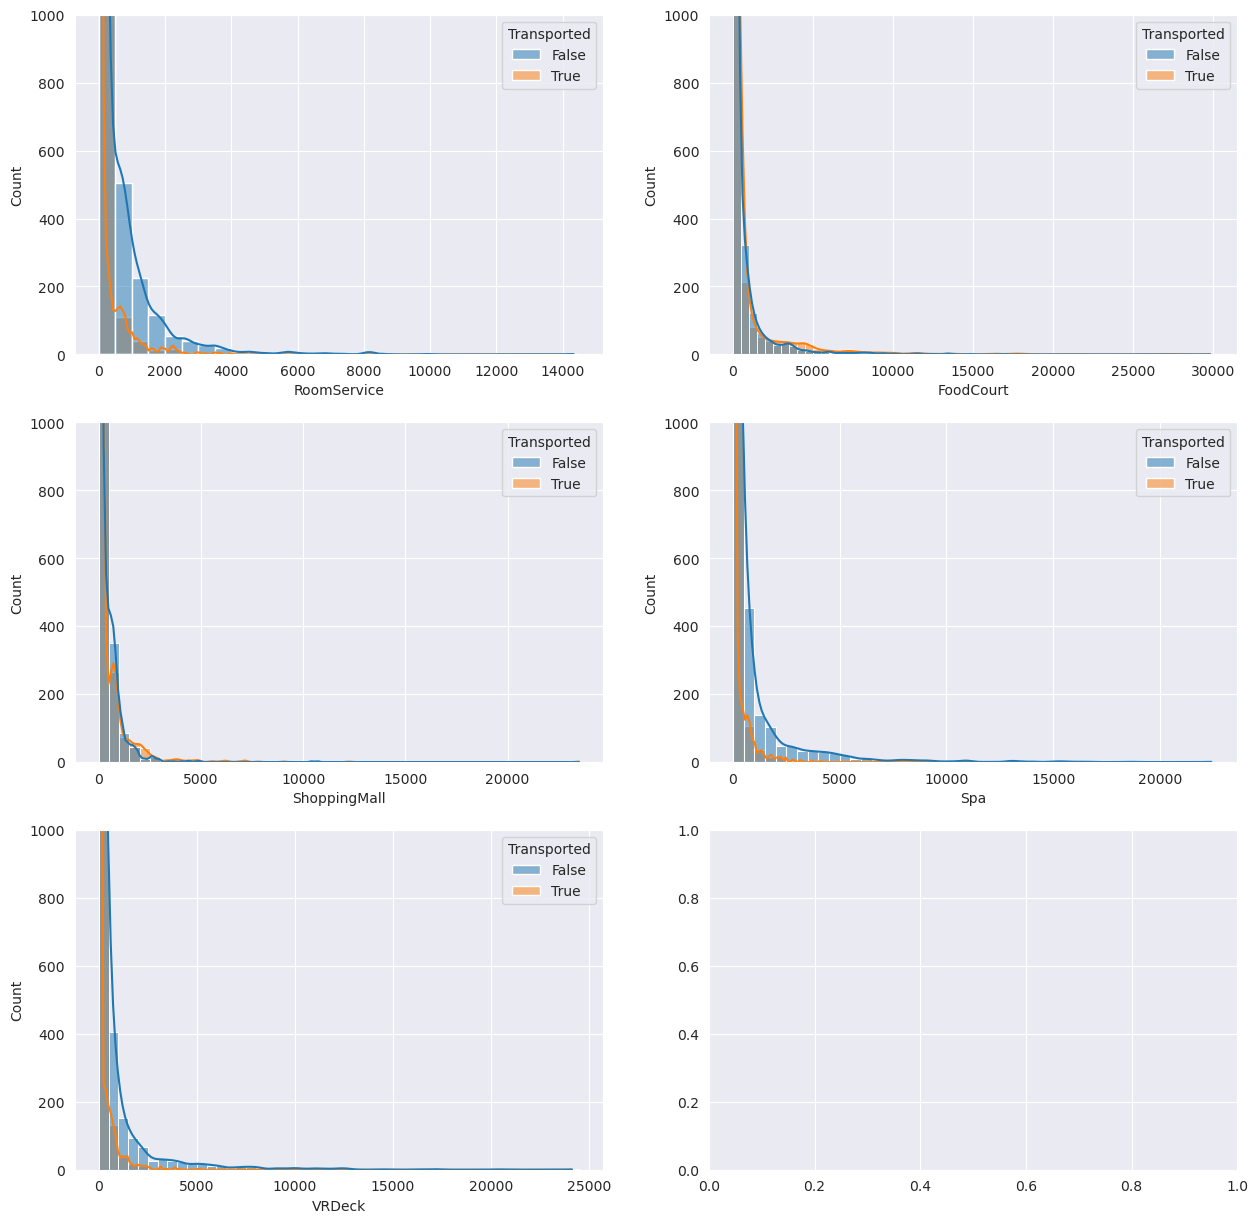

In [11]:
fig, ax = plt.subplots(3,2, figsize=(15,15))
sns.histplot(train, x='RoomService', hue='Transported',kde=True, binwidth=500, ax=ax[0][0]).set_ylim(0,1000)
sns.histplot(train, x='FoodCourt', hue='Transported',kde=True, binwidth=500, ax=ax[0][1]).set_ylim(0,1000)
sns.histplot(train, x='ShoppingMall', hue='Transported',kde=True, binwidth=500, ax=ax[1][0]).set_ylim(0,1000)
sns.histplot(train, x='Spa', hue='Transported',kde=True, binwidth=500, ax=ax[1][1]).set_ylim(0,1000)
sns.histplot(train, x='VRDeck', hue='Transported',kde=True, binwidth=500, ax=ax[2][0]).set_ylim(0,1000)

**Observations**:
1. transported passengers tend to spend less
2. the distribution of passenger's spending decreases drastically
3. most of the passenger don't spend money

<Axes: xlabel='Transported', ylabel='VRDeck'>

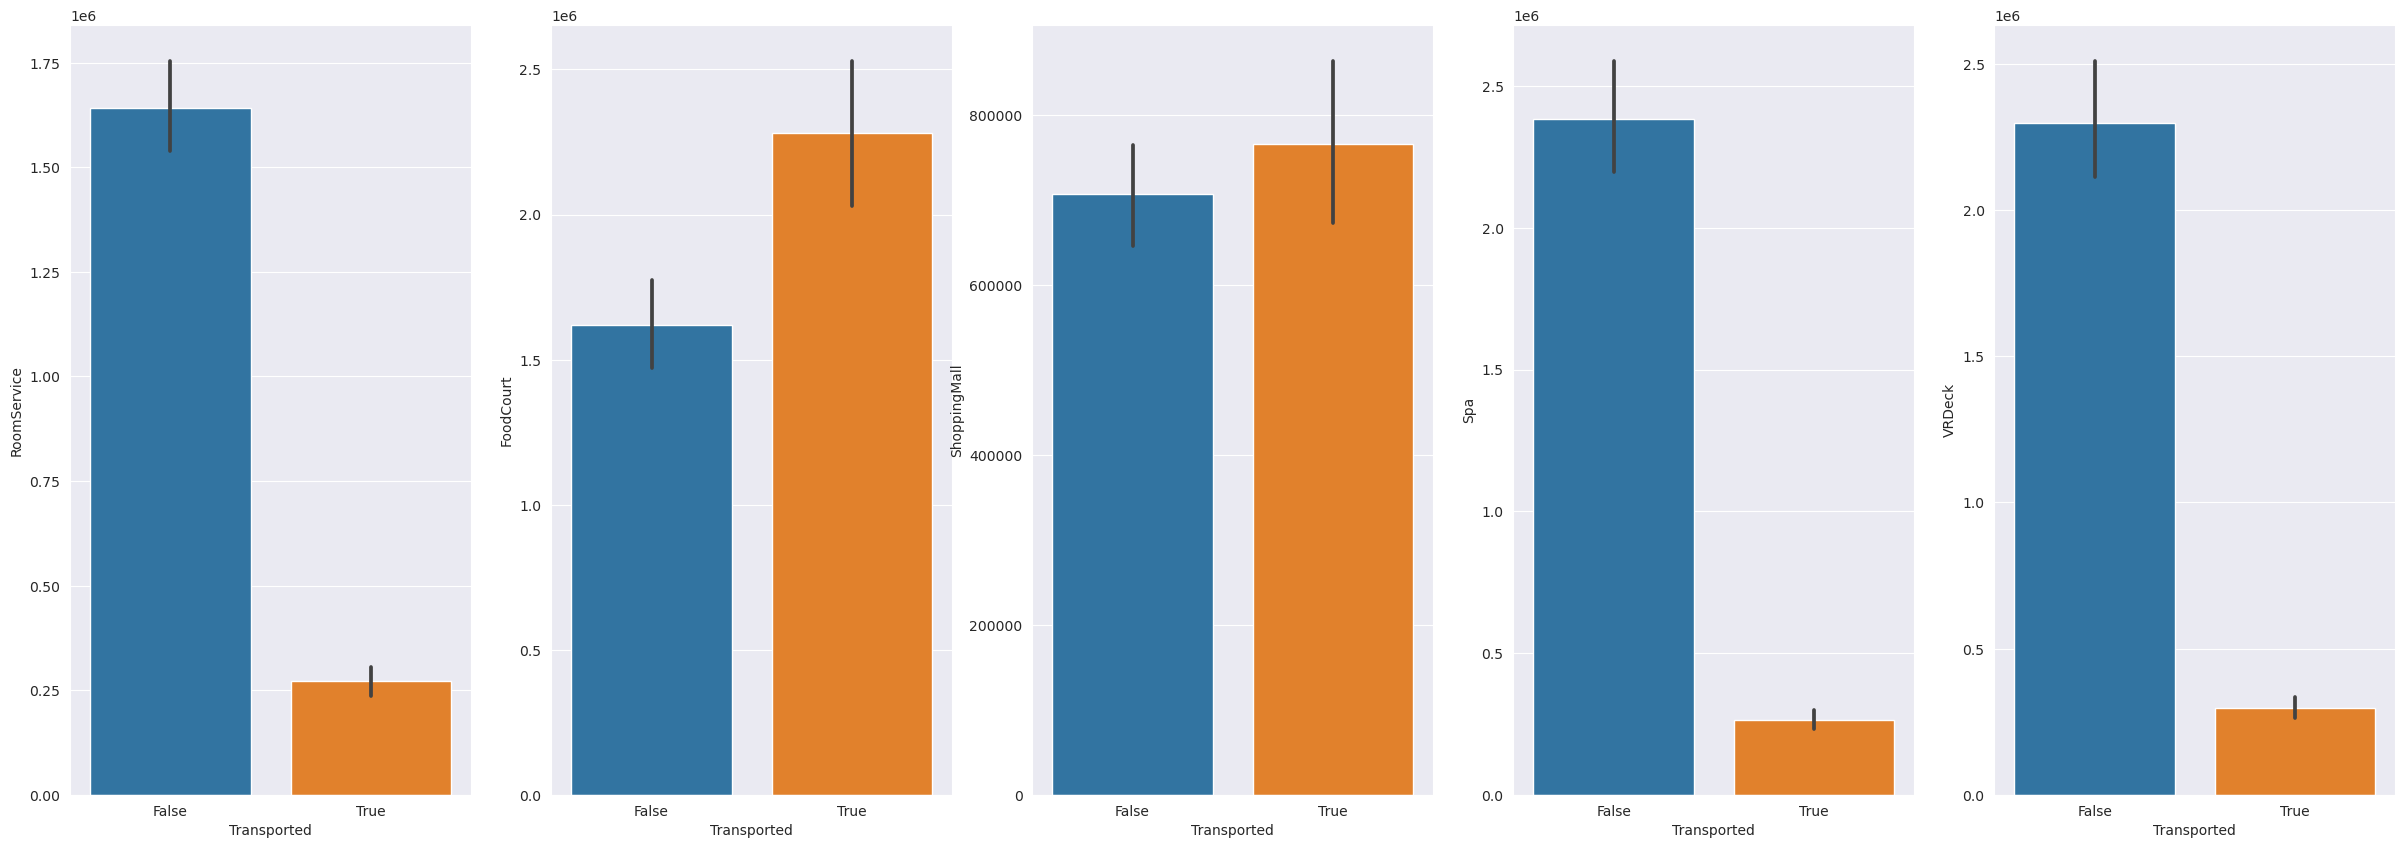

In [12]:
_, ax = plt.subplots(1,5, figsize=(30,10))
sns.barplot(train, x='Transported', y='RoomService', ax=ax[0], estimator='sum')
sns.barplot(train, x='Transported', y='FoodCourt', ax=ax[1], estimator='sum')
sns.barplot(train, x='Transported', y='ShoppingMall', ax=ax[2], estimator='sum')
sns.barplot(train, x='Transported', y='Spa', ax=ax[3], estimator='sum')
sns.barplot(train, x='Transported', y='VRDeck', ax=ax[4], estimator='sum')

Hmmm, the amount spent in total for Transported passengers is more for FoodCourt & ShoppingMall 

### Insights:
* create feature of the sum of spending
* create a categorical feature of the age (child, young, middle, senior)
* create a featuer to decide weather the passenger spend or not
* scale the numerical features

### Categorical features

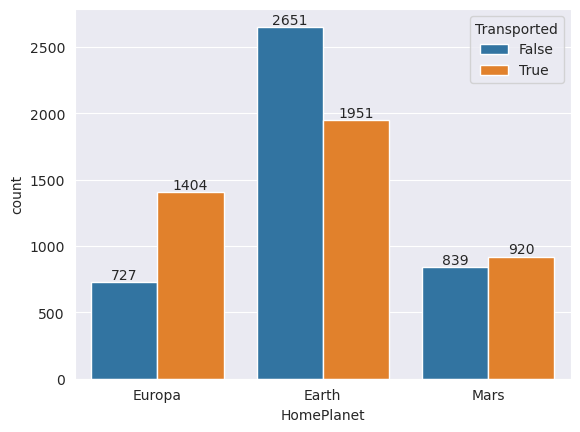

In [13]:
ax = sns.countplot(train, x='HomePlanet', hue='Transported')
for container in ax.containers:
    ax.bar_label(container)

**Notes:**
* for Europa almost 2/3 of the passengers transported
* almost 50% of the passengers from Mars transported
* almost 40% of the passengers from Earth transported

In [14]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


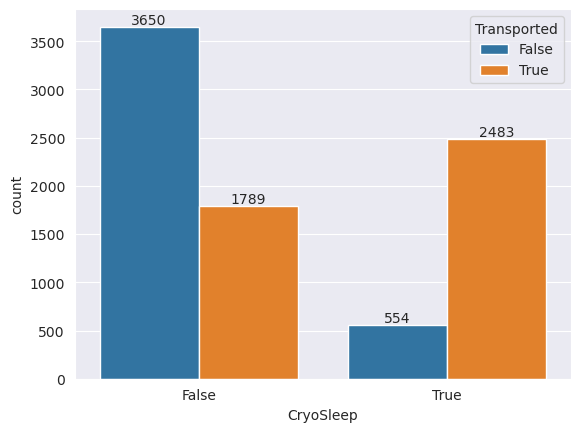

In [15]:
ax = sns.countplot(train, x='CryoSleep', hue='Transported')
for container in ax.containers:
    ax.bar_label(container)

**Notes:**
* 83% of the passengers that choose CryoSleep transported
* 33% of the passengers that didn't choose CryoSleep transported

**We can that CryoSleep feature plays an important role we'll dive into much details later**

We have to do some feature engineering on the cabin feature before analyzing it

Cabin - The cabin number where the passenger is staying. Takes the form **deck/num/side**, where side can be either P for Port or S for Starboard.

In [16]:
train[['Deck', 'Num', 'Side']] = train.Cabin.str.split('/', expand=True)
test[['Deck', 'Num', 'Side']] = test.Cabin.str.split('/', expand=True)

In [17]:
train['Num'] = train['Num'].astype(int, errors='ignore')
test['Num'] = test['Num'].astype(int, errors='ignore')

<Axes: xlabel='Side', ylabel='count'>

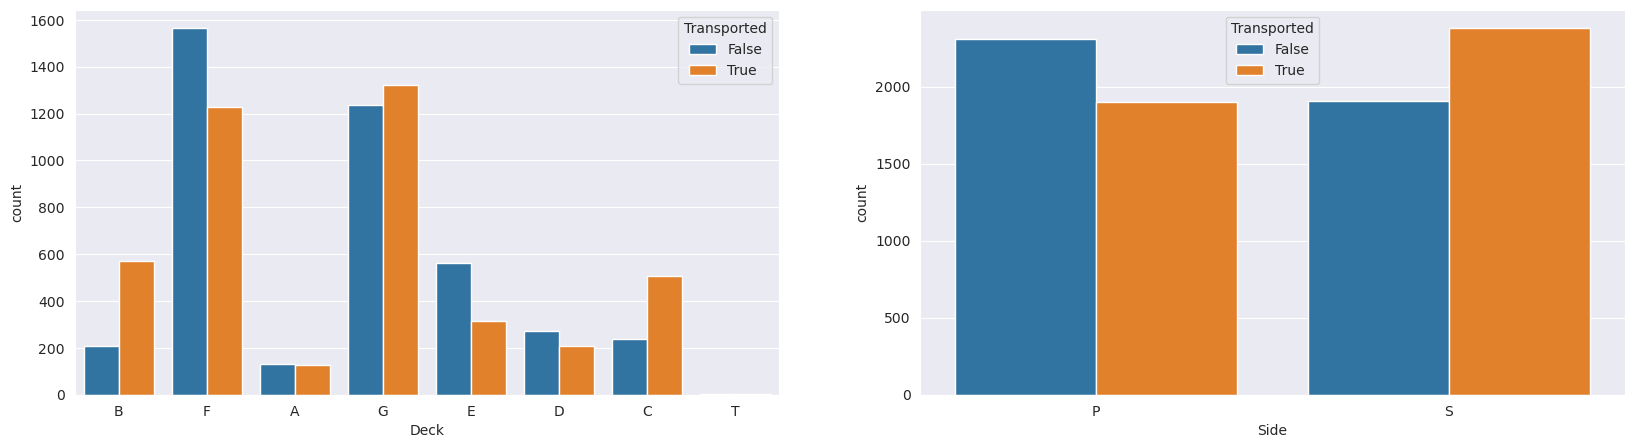

In [18]:
_, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(train, x='Deck', hue='Transported', ax=ax[0])
sns.countplot(train, x='Side', hue='Transported', ax=ax[1])

**Notes:**
* for the decks B, C more than 50% are transported
* the S side has more transported passengers compared to the P side

<Axes: xlabel='Deck', ylabel='count'>

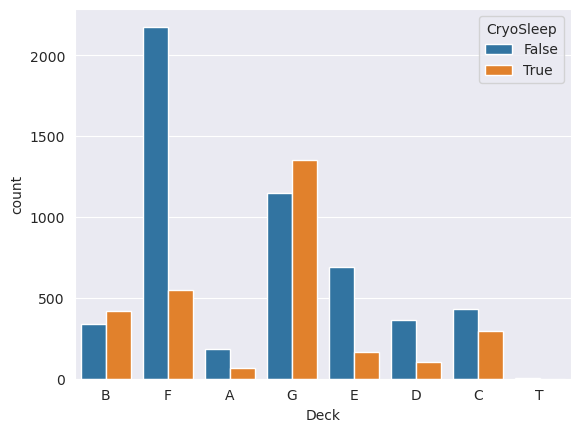

In [19]:
sns.countplot(train, x='Deck', hue='CryoSleep')

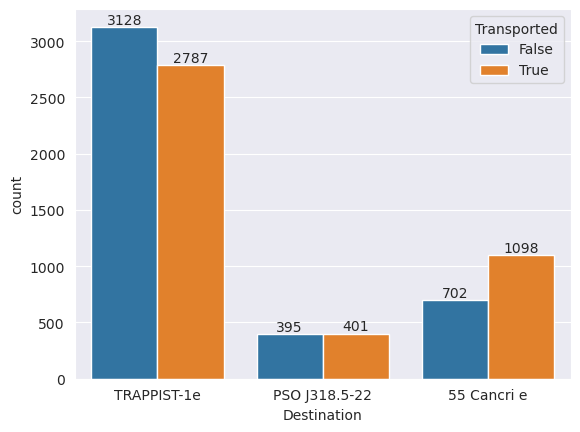

In [20]:
ax = sns.countplot(train, x='Destination', hue='Transported')
for container in ax.containers:
    ax.bar_label(container)

* almost 40% of passenger who went to '55 cancri e' transported
* 'PSO J318.5-22' has 50% change of being transported
* for 'TRAPPIST-1e' 2787 among 3128 (47%) trasnported

In [21]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [22]:
home_to_destination = train.pivot_table(index='HomePlanet', columns='Destination', values='Transported', aggfunc='mean')
home_to_destination

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,0.504348,0.498596,0.389229
Europa,0.689616,0.736842,0.634987
Mars,0.611399,0.448980,0.511864


<Axes: xlabel='Destination', ylabel='HomePlanet'>

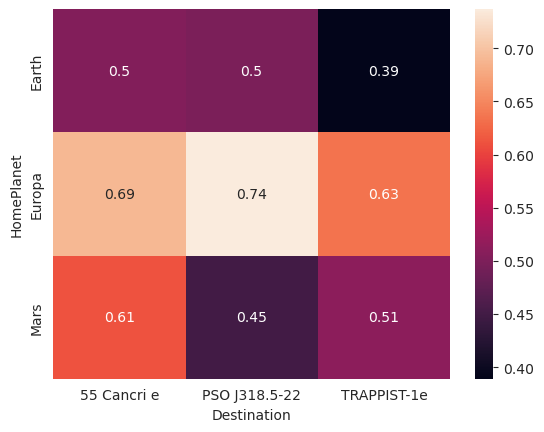

In [23]:
sns.heatmap(home_to_destination, annot=True)

**Notes**
* the roads with the highest transported propotion are:
    *  roads starting with Europa espically from Europa to PSO J318.5-22
    * Mars to 55 Cancri e
* the road with the lowest transported propotion is:
    * from Earth to TRAPPIST-1e
* the rest have almost 50%

<Axes: xlabel='VIP', ylabel='count'>

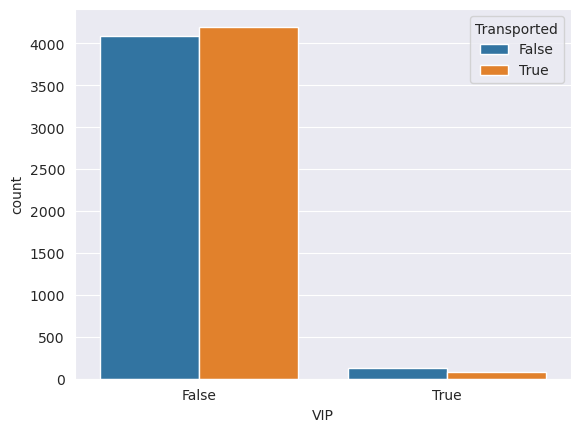

In [24]:
sns.countplot(train, x='VIP', hue='Transported')

it seems like there is no relationship between VIP and transported

# Feature Engineering

#### total spending 

<Axes: xlabel='Spending', ylabel='Count'>

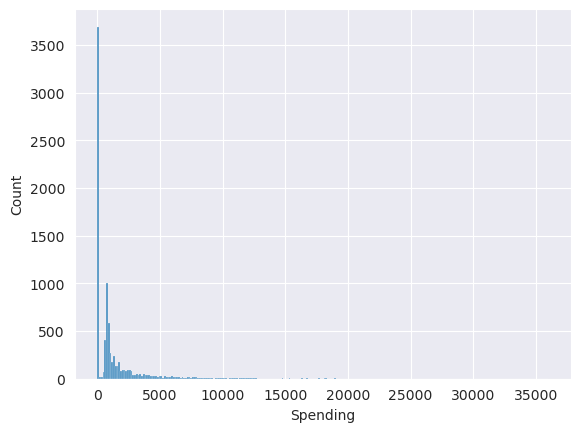

In [25]:
train['Spending'] = train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
test['Spending'] = test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

sns.histplot(train, x='Spending')

#### no_spend

feature of weather the passenger spend or not 

In [26]:
train['NoSpend'] = np.nan
train.loc[train.Spending != 0, 'NoSpend'] = False
train.loc[train.Spending == 0, 'NoSpend'] = True

test['NoSpend'] = np.nan
test.loc[test.Spending != 0, 'NoSpend'] = False
test.loc[test.Spending == 0, 'NoSpend'] = True

#### Group

* extract the passenger group from the **PassengerId**
* **PassengerId**: A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [27]:
train['Group'] = train.PassengerId.str[:4].astype(int)

test['Group'] = test.PassengerId.str[:4].astype(int)

#### Group_size

In [28]:
group_sizes = pd.concat([train['Group'], test['Group']], axis=0)
group_sizes = group_sizes.value_counts(ascending=False)

train['GroupSize'] = train['Group'].apply(lambda x: group_sizes[x])
test['GroupSize'] = test['Group'].apply(lambda x: group_sizes[x])

#### first name, last name

In [29]:
train['FirstName'] = train.Name.str.split(' ', expand=True)[0]
train['LastName'] = train.Name.str.split(' ', expand=True)[1]

test['FirstName'] = test.Name.str.split(' ', expand=True)[0]
test['LastName'] = test.Name.str.split(' ', expand=True)[1]

<Axes: xlabel='GroupSize', ylabel='count'>

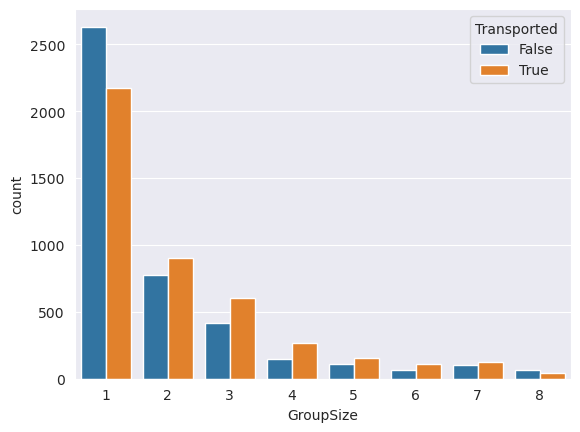

In [30]:
sns.countplot(train, x='GroupSize', hue='Transported')

In [31]:
train['Alone'] = train['GroupSize']==1
test['Alone'] = test['GroupSize']==1

#### Age

In [32]:
train['AgeGroup'] = np.nan
test['AgeGroup'] = np.nan

train.loc[train.Age<=12, 'AgeGroup'] = "0-12"
train.loc[(train.Age>12) & (train.Age<=18), 'AgeGroup'] = "13-18"
train.loc[(train.Age>18) & (train.Age<=25), 'AgeGroup'] = "19-25"
train.loc[(train.Age>25) & (train.Age<=30), 'AgeGroup'] = "26-30"
train.loc[(train.Age>30) & (train.Age<=50), 'AgeGroup'] = "31-50"
train.loc[train.Age>50, 'AgeGroup'] = "51+"

test.loc[test.Age<=12, 'AgeGroup'] = "0-12"
test.loc[(test.Age>12) & (test.Age<=18), 'AgeGroup'] = "13-18"
test.loc[(test.Age>18) & (test.Age<=25), 'AgeGroup'] = "19-25"
test.loc[(test.Age>25) & (test.Age<=30), 'AgeGroup'] = "26-30"
test.loc[(test.Age>30) & (test.Age<=50), 'AgeGroup'] = "31-50"
test.loc[test.Age>50, 'AgeGroup'] = "51+"

# Handling missing values

In [33]:
df = pd.concat([train.drop('Transported', axis=1), test]).reset_index(drop=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Num,Side,Spending,NoSpend,Group,GroupSize,FirstName,LastName,Alone,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0,P,0.0,True,1,1,Maham,Ofracculy,True,31-50
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0,S,736.0,False,2,1,Juanna,Vines,True,19-25
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0,S,10383.0,False,3,2,Altark,Susent,False,51+
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0,S,5176.0,False,3,2,Solam,Susent,False,31-50
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1,S,1091.0,False,4,1,Willy,Santantines,True,13-18


#### CryoSleep

In [34]:
df.CryoSleep.isna().sum()

310

after trying multiple features we found that we can impute CryoSleep with no_spend 

<Axes: xlabel='NoSpend', ylabel='count'>

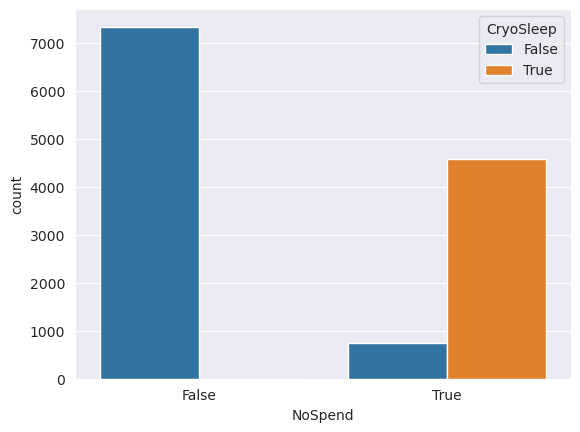

In [35]:
sns.countplot(df, x='NoSpend', hue='CryoSleep')

In [36]:
df.loc[(df.CryoSleep.isna()) & (df.NoSpend == 0), 'CryoSleep'] = False
df.loc[(df.CryoSleep.isna()) & (df.NoSpend == 1), 'CryoSleep'] = True

#### Home Planet

In [37]:
df.HomePlanet.isna().sum()

288

1. Home planet and last name

In [38]:
planet_family = df.groupby(['HomePlanet', 'LastName'])['HomePlanet'].size().unstack(level=0).fillna(0)
planet_family>0

HomePlanet,Earth,Europa,Mars
LastName,,,
Acobson,True,False,False
Acobsond,True,False,False
Adavisons,True,False,False
Adkinson,True,False,False
Alberts,True,False,False
...,...,...,...
Win,False,False,True
Winie,False,False,True
Wist,False,False,True


Now, let's check if each LastName comes from a single home planet

In [39]:
((planet_family>0).sum(axis=1)).value_counts()

1    2400
dtype: int64

Great, each last name is unique to a home planet, now let's try to fill the missing values

In [40]:
df.loc[df.HomePlanet.isna(),'HomePlanet'] = df.loc[df.HomePlanet.isna(),'LastName'].apply(lambda x: planet_family.idxmax(axis=1)[x] if x in planet_family.index else np.nan)

let's see now how much NaN we left with

In [41]:
df.HomePlanet.isna().sum()

17

Cool! now let's find another feature so we can handle this 10 missing values

2. Home planet and the group

In [42]:
planet_group = df.groupby(['HomePlanet', 'Group']).size().unstack(level=0).fillna(0)
planet_group

HomePlanet,Earth,Europa,Mars
Group,,,
2,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,2.0,0.0,0.0
7,1.0,0.0,0.0
...,...,...,...
9251,0.0,0.0,1.0
9255,0.0,0.0,1.0
9257,0.0,0.0,1.0


now let's check if each group comes from a unique planet

In [43]:
((planet_group>0).sum(axis=1)).unique()

array([1])

Cool! it's the same as LastName, each group comes from a unique home planet

In [44]:
df.loc[df.HomePlanet.isna(),'HomePlanet'] = df.loc[df.HomePlanet.isna(),'Group'].apply(lambda x: planet_group.idxmax(axis=1)[x] if x in planet_group.index else np.nan)

In [45]:
df.HomePlanet.isna().sum()

13

not bad we handled 4 missing values, we have to investigate more, the deck seems promissing

3. Home planet and the deck

<Axes: xlabel='HomePlanet', ylabel='count'>

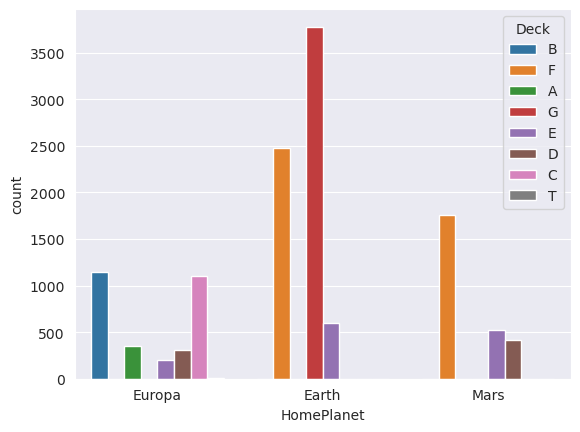

In [46]:
sns.countplot(df, x='HomePlanet', hue='Deck')

Great, that's interesting we can see some uniqueness when it comes to decks for example deck B exits only in Europa we can definitely benefit from that

In [47]:
planet_deck = df.groupby(['HomePlanet', 'Deck'])['Deck'].size().unstack(level=0)
planet_deck

HomePlanet,Earth,Europa,Mars
Deck,,,
A,NaN,353.0,NaN
B,NaN,1141.0,NaN
C,NaN,1101.0,NaN
D,NaN,306.0,411.0
E,595.0,203.0,523.0
F,2475.0,NaN,1759.0
G,3780.0,NaN,NaN
T,NaN,11.0,NaN


we will keep the decks with only 1 non missing value that means that it's unique to a given home planet

In [48]:
deck_counts = planet_deck.apply(lambda row: row.count(), axis=1)
deck_counts

Deck
A    1
B    1
C    1
D    2
E    3
F    2
G    1
T    1
dtype: int64

In [49]:
planet_deck = planet_deck[deck_counts==1]
planet_deck = planet_deck>0
planet_deck

HomePlanet,Earth,Europa,Mars
Deck,,,
A,False,True,False
B,False,True,False
C,False,True,False
G,True,False,False
T,False,True,False


In [50]:
df.loc[df.HomePlanet.isna(),'HomePlanet'] = df.loc[df.HomePlanet.isna(),'Deck'].apply(lambda x: planet_deck.idxmax(axis=1)[x] if x in planet_deck.index else np.nan)

In [51]:
df.HomePlanet.isna().sum()

10

:), 3 missing values handled

In [52]:
df[df.HomePlanet.isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Num,Side,Spending,NoSpend,Group,GroupSize,FirstName,LastName,Alone,AgeGroup
2274,2443_01,NaN,False,D/72/P,TRAPPIST-1e,31.0,False,1458.0,421.0,76.0,...,72,P,1955.0,False,2443,1,NaN,NaN,True,31-50
2631,2817_01,NaN,False,F/584/P,TRAPPIST-1e,25.0,False,237.0,0.0,910.0,...,584,P,1159.0,False,2817,1,Sealfs,Sutty,True,19-25
3091,3331_01,NaN,False,F/631/S,TRAPPIST-1e,40.0,False,666.0,4.0,83.0,...,631,S,803.0,False,3331,1,NaN,NaN,True,31-50
4548,4840_01,NaN,True,F/915/S,TRAPPIST-1e,36.0,False,0.0,0.0,NaN,...,915,S,0.0,True,4840,1,NaN,NaN,True,31-50
5762,6108_01,NaN,False,F/1166/S,TRAPPIST-1e,13.0,False,206.0,28.0,0.0,...,1166,S,864.0,False,6108,1,NaN,NaN,True,13-18
8969,0616_01,NaN,False,E/40/S,TRAPPIST-1e,31.0,False,0.0,428.0,NaN,...,40,S,2607.0,False,616,1,Arkaban,Spriney,True,31-50
10583,4052_01,NaN,False,D/136/P,TRAPPIST-1e,26.0,False,6.0,5903.0,0.0,...,136,P,6221.0,False,4052,1,Ankabih,Coneveseng,True,26-30
11913,7065_01,NaN,True,E/471/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,...,471,S,0.0,True,7065,1,Zedares,Maltorted,True,26-30
12551,8435_01,NaN,False,F/1730/P,TRAPPIST-1e,19.0,False,162.0,11.0,0.0,...,1730,P,1389.0,False,8435,1,NaN,NaN,True,19-25
12725,8775_01,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,...,275,P,0.0,True,8775,1,Raston,Maltorted,True,31-50


most of these passengers are heading towards TRAPPIST-1e

<Axes: xlabel='HomePlanet', ylabel='count'>

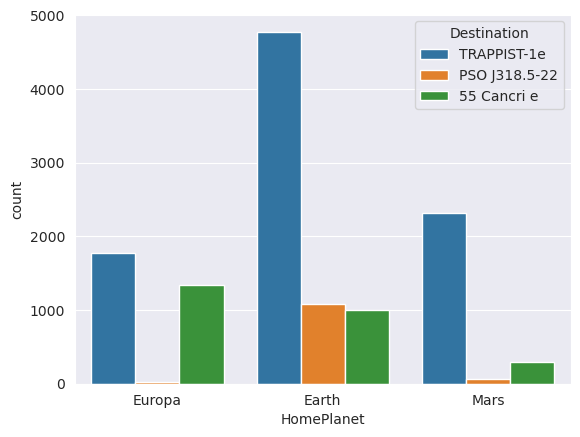

In [53]:
sns.countplot(df, x='HomePlanet', hue='Destination')

at this stage since we have 10 missing values we will just impute them using the mode of the destination, but note that we have to check the deck because previously we noticed no one in deck D comes from Earth

In [54]:
# the remaining passenger on the decks D, E and F
df.loc[(df.HomePlanet.isna()) & (df.Deck!='D'), 'HomePlanet'] = 'Earth'

# the remaining with deck D we will impute them with Mars it's the mode with D deck
df.loc[df.HomePlanet.isna(), 'HomePlanet'] = 'Mars'

In [55]:
df.HomePlanet.isna().sum()

0

**Finally**, we just take care of missing values in HomePlanet we have a lot of features to go through next

#### Destination

In [56]:
df.Destination.isna().sum()

274

we will impute the destination with the mode

In [57]:
df.loc[df.Destination.isna(), 'Destination'] = 'TRAPPIST-1e'
df.Destination.isna().sum()

0

#### LastName

In [58]:
df.LastName.isna().sum()

294

In [59]:
# last_name_group = 
last_name_group = df[df.GroupSize>1].groupby(['Group','LastName'])['LastName'].size().unstack().fillna(0)
(last_name_group>0).sum(axis=1).value_counts()

1    1769
2     322
3      43
4       1
dtype: int64

the majority of the groups have one family, we will impute the LastName with the mode in its group

In [60]:
df.loc[df.LastName.isna(), 'LastName'] = df.loc[df.LastName.isna(), 'Group'].apply(lambda x: last_name_group.idxmax(axis=1)[x] if x in last_name_group.index else np.nan)

In [61]:
df.loc[df.LastName.isna(), 'LastName'] = 'unknown'

#### VIP

<Axes: xlabel='VIP', ylabel='count'>

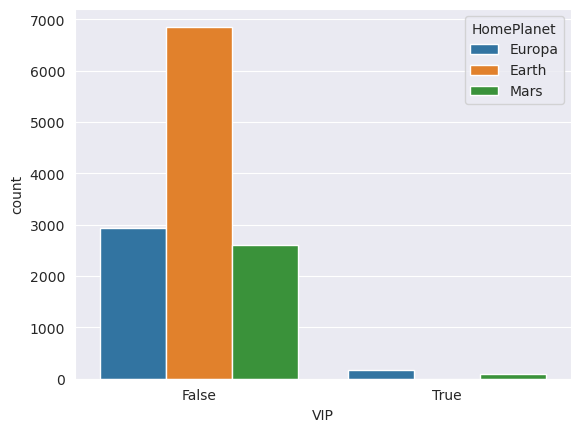

In [62]:
sns.countplot(df, x='VIP', hue='HomePlanet')

In [63]:
df.loc[df.VIP.isna(), 'VIP'] = False

In [64]:
df.VIP.isna().sum()

0

#### Age

the age varies across diffrent features like HomePlanet, VIP,  Deck, NoSpend and GroupSize we will fill the missing values using the median

In [65]:
df.groupby(['HomePlanet', 'NoSpend', 'Alone', 'Deck'])['Age'].median().unstack().fillna(0)

Deck                         A     B     C     D     E     F     G     T
HomePlanet NoSpend Alone                                                
Earth      False   False   0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                   True    0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           True    False   0.0   0.0   0.0   0.0   7.0  15.0   9.0   0.0
                   True    0.0   0.0   0.0   0.0  21.0  25.0  23.0   0.0
Europa     False   False  34.5  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                   True   35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           True    False  30.0  27.0  28.0  27.0  28.0   0.0   0.0   0.0
                   True   37.5  34.0  34.5  31.0  33.0   0.0   0.0   0.0
Mars       False   False   0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                   True    0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           True    False   0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                   True    0.0   0.0   0.0  33.0  30.0  29.0   0.0   0.0

In [66]:
na_rows = df.loc[df.Age.isna(), 'Age'].index
df.loc[df.Age.isna(), 'Age'] = df.groupby(['HomePlanet', 'NoSpend', 'Alone', 'Deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows]

updating the age group

In [67]:
df.loc[df.Age<=12, 'AgeGroup'] = "0-12"
df.loc[(df.Age>12) & (df.Age<=18), 'AgeGroup'] = "13-18"
df.loc[(df.Age>18) & (df.Age<=25), 'AgeGroup'] = "19-25"
df.loc[(df.Age>25) & (df.Age<=30), 'AgeGroup'] = "26-30"
df.loc[(df.Age>30) & (df.Age<=50), 'AgeGroup'] = "31-50"
df.loc[df.Age>50, 'AgeGroup'] = "51+"

#### Deck

In [68]:
df.Deck.isna().sum()

299

In [69]:
deck_group = df.groupby(['Group', 'Deck'])['Deck'].size().unstack().fillna(0)
((deck_group>0).sum(axis=1)).value_counts()

1    8446
2     640
3      33
dtype: int64

The majority of groups come from the same deck

In [70]:
df.loc[df.Deck.isna(), 'Deck'] = df.loc[df.Deck.isna(), 'Group'].apply(lambda x: deck_group.idxmax(axis=1)[x] if x in deck_group.index else np.nan)

In [71]:
df.Deck.isna().sum()

162

In [72]:
df.groupby(['HomePlanet','Alone','Destination', 'Deck'])['Deck'].size().unstack().fillna(0)

Deck                                A      B      C      D      E       F  \
HomePlanet Alone Destination                                                
Earth      False 55 Cancri e      0.0    0.0    0.0    0.0   20.0    90.0   
                 PSO J318.5-22    0.0    0.0    0.0    0.0   18.0    67.0   
                 TRAPPIST-1e      0.0    0.0    0.0    0.0  133.0   438.0   
           True  55 Cancri e      0.0    0.0    0.0    0.0   47.0   289.0   
                 PSO J318.5-22    0.0    0.0    0.0    0.0   25.0   262.0   
                 TRAPPIST-1e      0.0    0.0    0.0    0.0  358.0  1350.0   
Europa     False 55 Cancri e     96.0  377.0  313.0   59.0   35.0     0.0   
                 PSO J318.5-22    2.0    5.0   11.0    0.0    0.0     0.0   
                 TRAPPIST-1e    152.0  459.0  428.0  120.0   53.0     0.0   
           True  55 Cancri e     67.0  141.0  159.0   46.0   34.0     0.0   
                 PSO J318.5-22    0.0    0.0   10.0    0.0    0.0     0.0   
                 TRAPPIST-1e     44.0  179.0  201.0   84.0   82.0     0.0   
Mars       False 55 Cancri e      0.0    0.0    0.0   32.0   15.0   104.0   
                 PSO J318.5-22    0.0    0.0    0.0    8.0    9.0    14.0   
                 TRAPPIST-1e      0.0    0.0    0.0  168.0  219.0   798.0   
           True  55 Cancri e      0.0    0.0    0.0   40.0   16.0    92.0   
                 PSO J318.5-22    0.0    0.0    0.0    9.0    7.0    21.0   
                 TRAPPIST-1e      0.0    0.0    0.0  164.0  263.0   743.0   

Deck                                 G    T  
HomePlanet Alone Destination                 
Earth      False 55 Cancri e     272.0  0.0  
                 PSO J318.5-22   230.0  0.0  
                 TRAPPIST-1e    1075.0  0.0  
           True  55 Cancri e     269.0  0.0  
                 PSO J318.5-22   466.0  0.0  
                 TRAPPIST-1e    1509.0  0.0  
Europa     False 55 Cancri e       0.0  2.0  
                 PSO J318.5-22     0.0  0.0  
                 TRAPPIST-1e       0.0  1.0  
           True  55 Cancri e       0.0  0.0  
                 PSO J318.5-22     0.0  0.0  
                 TRAPPIST-1e       0.0  8.0  
Mars       False 55 Cancri e       0.0  0.0  
                 PSO J318.5-22     0.0  0.0  
                 TRAPPIST-1e       0.0  0.0  
           True  55 Cancri e       0.0  0.0  
                 PSO J318.5-22     0.0  0.0  
                 TRAPPIST-1e       0.0  0.0

In [73]:
na_rows = df.loc[df.Deck.isna(), 'Deck'].index
df.loc[df.Deck.isna(), 'Deck'] = df.groupby(['HomePlanet','Alone','Destination'])['Deck'].transform(lambda x: pd.Series.mode(x)[0])[na_rows]

In [74]:
df.Deck.isna().sum()

0

#### Side

In [75]:
df.Side.isna().sum()

299

In [76]:
side_group = df.groupby(['Side', 'Group'])['Side'].size().unstack(0).fillna(0)

((side_group>0).sum(axis=1)).value_counts()

1    9119
dtype: int64

Great, every passenger in the same group is also in the same cabin side

In [77]:
df.loc[df.Side.isna(), 'Side'] = df.loc[df.Side.isna(), 'Group'].apply(lambda x: side_group.idxmax(axis=1)[x] if x in side_group.index else np.nan)

In [78]:
df.Side.isna().sum()

162

In [79]:
side_family = df[df.GroupSize>1].groupby(['LastName', 'Side'])['Side'].size().unstack().fillna(0)

((side_family>0).sum(axis=1)).value_counts()

1    1251
2     380
dtype: int64

most of the passenger with their family are in the same side (in the case of groupsize > 1)

In [80]:
df.loc[df.Side.isna(), 'Side'] = df.loc[df.Side.isna(), 'LastName'].apply(lambda x: side_family.idxmax(axis=1)[x] if x in side_family.index else np.nan)

In [81]:
df.Side.isna().sum()

66

In [82]:
df.groupby(['HomePlanet','Alone','Destination', 'Side'])['Side'].size().unstack().fillna(0)

Side                               P     S
HomePlanet Alone Destination              
Earth      False 55 Cancri e     158   224
                 PSO J318.5-22   174   141
                 TRAPPIST-1e     813   833
           True  55 Cancri e     317   298
                 PSO J318.5-22   380   384
                 TRAPPIST-1e    1666  1584
Europa     False 55 Cancri e     410   472
                 PSO J318.5-22     8    10
                 TRAPPIST-1e     571   642
           True  55 Cancri e     224   233
                 PSO J318.5-22     5     5
                 TRAPPIST-1e     292   317
Mars       False 55 Cancri e      85    66
                 PSO J318.5-22    15    16
                 TRAPPIST-1e     597   590
           True  55 Cancri e      75    73
                 PSO J318.5-22    21    16
                 TRAPPIST-1e     589   600

Side seems a balanced features we will replace missing values with an outlier since we don't know what to impute it with

In [83]:
df.Side.value_counts()

S    6504
P    6400
Name: Side, dtype: int64

In [84]:
df.loc[df.Side.isna(), 'Side'] = 'X'

In [85]:
df.Side.isna().sum()

0

#### Cabin Num

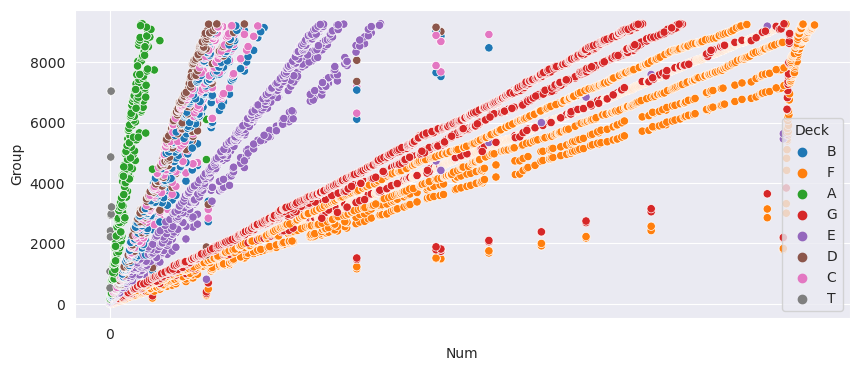

In [86]:
plt.figure(figsize=(10,4))
ax = sns.scatterplot(df, y='Group', x='Num', hue='Deck')
ax.set_xticks(range(0, 200, 250))

we can see there is a linear relationship between the cabin number and the group, grouped with the cabin deck

In [87]:
from sklearn.linear_model import LinearRegression

### todo: lineear regression
for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    
    model = LinearRegression()
    
    x_train_ = df.loc[~(df.Num.isna()) & (df.Deck == deck) , 'Group'].values.reshape(-1, 1)
    y_train_ = df.loc[~(df.Num.isna()) & (df.Deck == deck), 'Num'].values.reshape(-1, 1)
    x_test_ = df.loc[(df.Num.isna()) & (df.Deck == deck) , 'Group'].values.reshape(-1, 1)
    
    model.fit(x_train_, y_train_)
    pred = model.predict(x_test_)
    
    df.loc[(df.Num.isna()) & (df.Deck == deck), 'Num'] = pred.astype(int)

In [88]:
df.Num.isna().sum()

0

#### Cabin

updating the cabin

In [89]:
df['Cabin'] = df[['Deck', 'Num', 'Side']].apply(lambda row: '/'.join([str(val) for val in row]), axis=1)

#### Age

the age varies across diffrent features like HomePlanet, VIP,  Deck, NoSpend and GroupSize we will fill the missing values using the median

In [90]:
df.groupby(['HomePlanet', 'NoSpend', 'Alone', 'Deck'])['Age'].median().unstack().fillna(0)

Deck                         A     B     C     D     E     F     G     T
HomePlanet NoSpend Alone                                                
Earth      False   False   0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                   True    0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           True    False   0.0   0.0   0.0   0.0   7.0  16.0   9.0   0.0
                   True    0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     False   False  34.5  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                   True   35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           True    False  30.0  27.0  28.0  27.0  28.0   0.0   0.0   0.0
                   True   37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       False   False   0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                   True    0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           True    False   0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                   True    0.0   0.0   0.0  33.0  30.0  29.0   0.0   0.0

In [91]:
na_rows = df.loc[df.Age.isna(), 'Age'].index
df.loc[df.Age.isna(), 'Age'] = df.groupby(['HomePlanet', 'NoSpend', 'Alone', 'Deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows]

In [92]:
df.loc[df.Age<=12, 'AgeGroup'] = "0-12"
df.loc[(df.Age>12) & (df.Age<=18), 'AgeGroup'] = "13-18"
df.loc[(df.Age>18) & (df.Age<=25), 'AgeGroup'] = "19-25"
df.loc[(df.Age>25) & (df.Age<=30), 'AgeGroup'] = "26-30"
df.loc[(df.Age>30) & (df.Age<=50), 'AgeGroup'] = "31-50"
df.loc[df.Age>50, 'AgeGroup'] = "51+"

#### RoomService - FoodCourt - ShoppingMall - Spa - VRDeck

remember before passenger with CrySleep tend to spend nothing

<Axes: xlabel='CryoSleep', ylabel='count'>

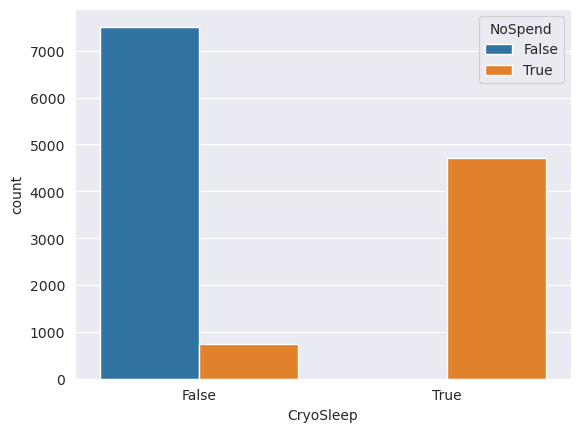

In [93]:
sns.countplot(df, x='CryoSleep', hue='NoSpend')

In [94]:
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df.loc[df.CryoSleep == True, col] = 0

In [95]:
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    na_rows = df.loc[df[col].isna(), col].index
    df.loc[df[col].isna(), col] = df.groupby(['HomePlanet', 'Alone', 'AgeGroup'])[col].transform(lambda x: x.fillna(x.mean()))

#### update spending

In [96]:
df['Spending'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [97]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            294
Deck              0
Num               0
Side              0
Spending          0
NoSpend           0
Group             0
GroupSize         0
FirstName       294
LastName          0
Alone             0
AgeGroup          0
dtype: int64

the first name is no big deal since we will drop it later

# Preprocessing

In [98]:
X = df[df.PassengerId.isin(train.PassengerId.values)].copy()
y = train['Transported'].copy().astype(int)

X_test = df[df.PassengerId.isin(test.PassengerId.values)].copy()

In [99]:
X.shape, y.shape, X_test.shape

((8693, 24), (8693,), (4277, 24))

In [100]:
X.drop(columns=['PassengerId', 'Cabin', 'Name', 'FirstName', 'LastName', 'AgeGroup', 'Group', 'GroupSize'], axis=1, inplace=True)
X_test.drop(columns=['PassengerId', 'Cabin', 'Name', 'FirstName', 'LastName', 'AgeGroup', 'Group', 'GroupSize'], axis=1, inplace=True)

In [101]:
X['Num'] = X['Num'].astype(int)
X_test['Num'] = X_test['Num'].astype(int)

#### Scaling & one hot encoding

In [102]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


num_cols = [col for col in X.columns if X[col].dtype in ['float64', 'int64']]
cat_cols = [col for col in X.columns if X[col].dtype in ['object', 'bool']]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='if_binary', sparse=False)

preprocessor = ColumnTransformer(
                    transformers = [
                        ('num', numeric_transformer, num_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ])

X = preprocessor.fit_transform(X)
X_test = preprocessor.transform(X_test)

In [103]:
X.shape

(8693, 29)

# Model Selection

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,test_size=0.2,random_state=100)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "SCV": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "lightgbm": LGBMClassifier(),
    "catboost": CatBoostClassifier(verbose=False),
    "XGBoost": XGBClassifier(),
}

lr_grid = {
    'penalty':['l1', 'l2'],
    'C': [0.25, 0.5, 0.75, 1, 1.25],
    'max_iter': [50, 100, 150, 200]
}

svc_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.25],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

rf_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 8, 12, 16, 20],
    'min_samples_split': [2, 5, 10]
}
knn_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
nb_grid = {
    'var_smoothing': [1e-2, 1e-4, 1e-6, 1e-7, 1e-9, 1e-11]
}

boosting_grid = {
    'max_depth': [4, 8, 12],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15]
}

grid = {
    "Logistic Regression": lr_grid,
    "SCV": svc_grid,
    "Random Forest": rf_grid,
    "KNN": knn_grid,
    "Naive Bayes": nb_grid,
    "XGBoost": boosting_grid,
    "lightgbm": boosting_grid,
    "catboost": boosting_grid
}

Trying each model created with GridSearchCv but without cross validation it's going to take too long

In [106]:
from sklearn.model_selection import GridSearchCV
import time

scores = pd.DataFrame({'Model': models.keys(), 
                       'Validation Accuracy': np.zeros(len(models)),
                       'Training Time': np.zeros(len(models))
                      })
model_best_params = models.copy()
i = 0

for key, model in models.items():
    print('Model: ', key)
    start = time.time()
    
    grid_search = GridSearchCV(estimator=model, param_grid=grid[key], cv=None, n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    scores.iloc[i, 1] = grid_search.score(X_valid, y_valid)
    
    model_best_params[key] = grid_search.best_params_
    
    stop = time.time()
    
    scores.iloc[i, 2] = np.round((stop - start), 2)
    
    print('Model training time(s) : ', scores.iloc[i, 2])
    i += 1

Model:  Logistic Regression


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model training time(s) :  4.5
Model:  SCV
Model training time(s) :  66.1
Model:  Random Forest
Model training time(s) :  103.46
Model:  KNN
Model training time(s) :  6.13
Model:  Naive Bayes
Model training time(s) :  0.19
Model:  lightgbm
Model training time(s) :  109.77
Model:  catboost
Model training time(s) :  613.79
Model:  XGBoost
Model training time(s) :  408.39


In [107]:
scores.rename({"Training Time": "Training Time(s)"}, axis=1, inplace=True)

In [108]:
scores['Training Time(min)'] = np.round(scores['Training Time(s)'] / 60, 2)

In [109]:
scores

,Model,Validation Accuracy,Training Time(s),Training Time(min)
0,Logistic Regression,0.788959,4.50,0.08
1,SCV,0.811386,66.10,1.10
2,Random Forest,0.804485,103.46,1.72
3,KNN,0.788959,6.13,0.10
4,Naive Bayes,0.759057,0.19,0.00
5,lightgbm,0.805060,109.77,1.83
6,catboost,0.813111,613.79,10.23
7,XGBoost,0.810811,408.39,6.81


In [110]:
model_best_params

{'Logistic Regression': {'C': 0.5, 'max_iter': 100, 'penalty': 'l2'},
 'SCV': {'C': 1.25, 'gamma': 'scale', 'kernel': 'rbf'},
 'Random Forest': {'max_depth': 16,
  'min_samples_split': 10,
  'n_estimators': 150},
 'KNN': {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'},
 'Naive Bayes': {'var_smoothing': 0.01},
 'lightgbm': {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 100},
 'catboost': {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150},
 'XGBoost': {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}}

Running cross validation on the best 3 models 

In [111]:
from sklearn.model_selection import cross_val_score

best_models = {
    'SCV': SVC(**model_best_params['SCV']),
    'catboost': CatBoostClassifier(**model_best_params['catboost'], verbose=False),
    'XGBoost': XGBClassifier(**model_best_params['XGBoost'])
}

for key, model in best_models.items():
    
    print('Model: ', key)
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, verbose=False) # 10 fold cross validation
    print('Accuracy: ', scores.mean()) # scores containt 10 accuracy values for each fold we want to average them out
    print('='*10)

Model:  SCV
Accuracy:  0.8006510323664406
Model:  catboost
Accuracy:  0.800423924976522
Model:  XGBoost
Accuracy:  0.7799437852995251


# Submission

In [112]:
final_model = SVC(**model_best_params['SCV'])
final_model.fit(X, y)

predictions = final_model.predict(X_test)

In [113]:
prediction = predictions==1

In [114]:
submission = pd.DataFrame({'PassengerId': test.PassengerId.values, 'Transported': prediction})

In [115]:
submission.to_csv('submission.csv', index=False)